In [173]:
import pandas
import re
import matplotlib.pyplot as plot

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras import Sequential, Input
from keras.layers import Dense, Rescaling, Conv2D, MaxPooling2D, Flatten, Embedding, LSTM
from keras.utils import image_dataset_from_directory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

Data classification

In [112]:
def create_frame():
    frame = pandas.read_csv("data.csv")
    frame.isnull().any()
    return(frame)

frame = create_frame()
frame.dropna(inplace=True)
frame.head()
frame["Gender"] = preprocessing.LabelEncoder().fit_transform(frame["Gender"])
frame2 = frame.drop('User ID', axis=1)
data_normal = preprocessing.normalize(frame.drop('User ID', axis=1), axis=0)
frame_normal = pandas.DataFrame(data_normal, columns=frame2.columns)
a = frame_normal.drop('Purchased', axis=1)
b = frame2['Purchased']

In [113]:
model = Sequential([
    Dense(32, activation='relu', kernel_initializer='random_normal', input_dim=3),
    Dense(32, activation='relu', kernel_initializer='random_normal'),
    Dense(2, activation='sigmoid', kernel_initializer='random_normal')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 32)                128       
                                                                 
 dense_181 (Dense)           (None, 32)                1056      
                                                                 
 dense_182 (Dense)           (None, 2)                 66        
                                                                 
Total params: 1,250
Trainable params: 1,250
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300


C:\Users\kushn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


5/5 [==============================] - 0s 26ms/step - loss: 0.6921 - accuracy: 0.6562 - val_loss: 0.6907 - val_accuracy: 0.6750
Epoch 2/300
5/5 [==============================] - 0s 5ms/step - loss: 0.6899 - accuracy: 0.6687 - val_loss: 0.6879 - val_accuracy: 0.6750
Epoch 3/300
5/5 [==============================] - 0s 5ms/step - loss: 0.6866 - accuracy: 0.6687 - val_loss: 0.6850 - val_accuracy: 0.6750
Epoch 4/300
5/5 [==============================] - 0s 5ms/step - loss: 0.6841 - accuracy: 0.6687 - val_loss: 0.6815 - val_accuracy: 0.6750
Epoch 5/300
5/5 [==============================] - 0s 5ms/step - loss: 0.6808 - accuracy: 0.6687 - val_loss: 0.6776 - val_accuracy: 0.6750
Epoch 6/300
5/5 [==============================] - 0s 5ms/step - loss: 0.6764 - accuracy: 0.6687 - val_loss: 0.6735 - val_accuracy: 0.6750
Epoch 7/300
5/5 [==============================] - 0s 5ms/step - loss: 0.6723 - accuracy: 0.6687 - val_loss: 0.6689 - val_accuracy: 0.6750
Epoch 8/300
5/5 [=====================

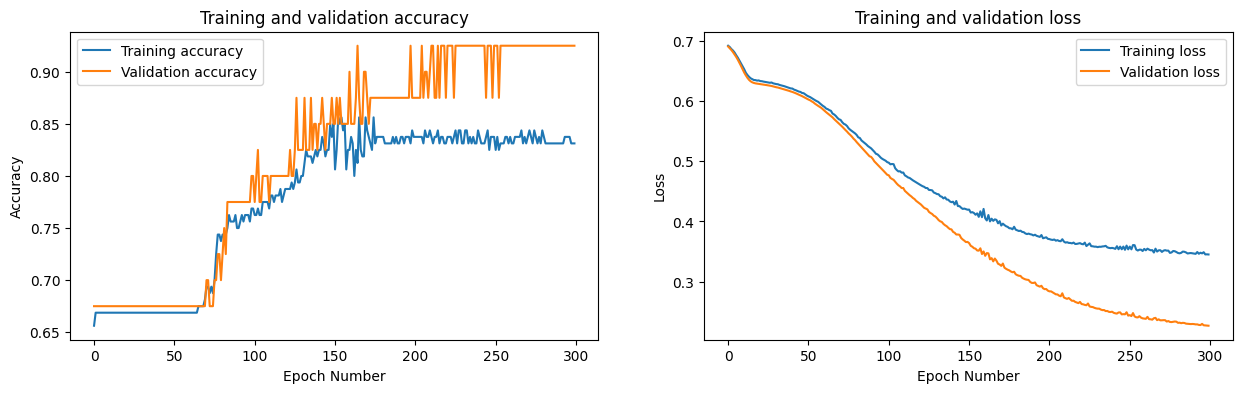

In [114]:
A_train, A_test, B_train, B_test = train_test_split(a, b, train_size=0.5, random_state = 0)
history = model.fit(A_train, B_train, epochs=300, validation_split=0.2)
figure = plot.figure(figsize=(15,4))
figure.add_subplot(121)
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.legend(['Training accuracy', 'Validation accuracy'])
plot.title('Training and validation accuracy')
plot.xlabel('Epoch Number')
plot.ylabel('Accuracy')
figure.add_subplot(122)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.legend(['Training loss', 'Validation loss'])
plot.title('Training and validation loss')
plot.xlabel('Epoch Number')
plot.ylabel('Loss')
plot.show()

Images classification

In [115]:
batch_size = 16
img_height = 72
img_width = 128

A_train = image_dataset_from_directory(
    './img/',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

A_test = image_dataset_from_directory(
    './img/',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 5478 files belonging to 4 classes.
Using 4383 files for training.
Found 5478 files belonging to 4 classes.
Using 1095 files for validation.


In [116]:
classes = A_train.class_names
print(classes)

['jerry', 'tom', 'tom_jerry_0', 'tom_jerry_1']


In [122]:
model_img = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='sigmoid', kernel_initializer='random_normal')
])
model_img.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_img.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 72, 128, 3)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 128, 16)       448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 36, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 36, 64, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 18, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 18, 32, 64)      

Epoch 1/10
274/274 [==============================] - 12s 42ms/step - loss: 1.2690 - accuracy: 0.3984 - val_loss: 1.0905 - val_accuracy: 0.5425
Epoch 2/10
274/274 [==============================] - 11s 42ms/step - loss: 0.9367 - accuracy: 0.6224 - val_loss: 0.7981 - val_accuracy: 0.7005
Epoch 3/10
274/274 [==============================] - 11s 42ms/step - loss: 0.6397 - accuracy: 0.7611 - val_loss: 0.6267 - val_accuracy: 0.7699
Epoch 4/10
274/274 [==============================] - 11s 42ms/step - loss: 0.4535 - accuracy: 0.8309 - val_loss: 0.5485 - val_accuracy: 0.8155
Epoch 5/10
274/274 [==============================] - 11s 42ms/step - loss: 0.3220 - accuracy: 0.8793 - val_loss: 0.5679 - val_accuracy: 0.8046
Epoch 6/10
274/274 [==============================] - 12s 43ms/step - loss: 0.2319 - accuracy: 0.9147 - val_loss: 0.6359 - val_accuracy: 0.8311
Epoch 7/10
274/274 [==============================] - 12s 42ms/step - loss: 0.1778 - accuracy: 0.9370 - val_loss: 0.5885 - val_accuracy:

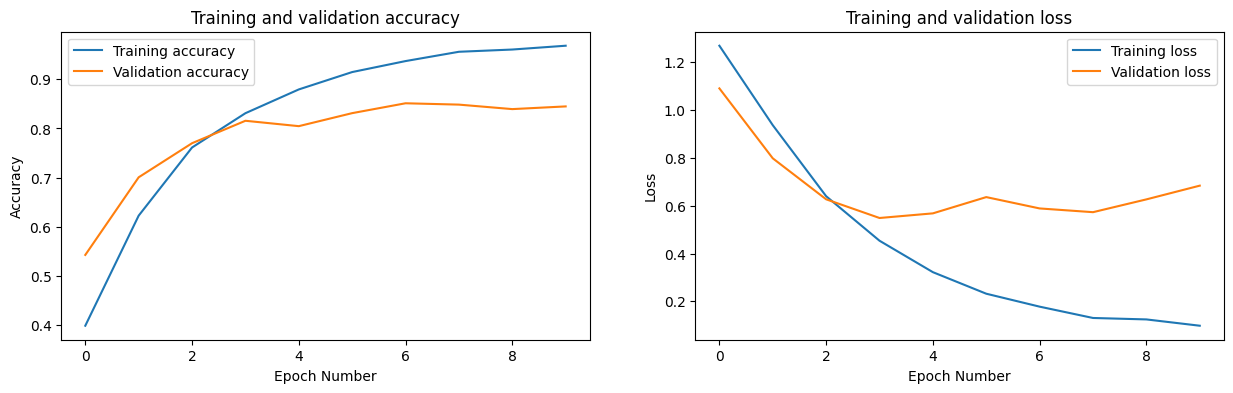

In [123]:
history = model_img.fit(A_train, validation_data=A_test, epochs=10, validation_split=0.2)
figure = plot.figure(figsize=(15,4))
figure.add_subplot(121)
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.legend(['Training accuracy', 'Validation accuracy'])
plot.title('Training and validation accuracy')
plot.xlabel('Epoch Number')
plot.ylabel('Accuracy')
figure.add_subplot(122)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.legend(['Training loss', 'Validation loss'])
plot.title('Training and validation loss')
plot.xlabel('Epoch Number')
plot.ylabel('Loss')
plot.show()

Texts classification

In [184]:
def create_text_frame():
    frame = pandas.read_csv('data_text.csv', index_col=False, encoding="utf8", nrows=10000)
    frame = pandas.DataFrame(frame)
    return frame

text_frame = create_text_frame()
text_frame = text_frame.drop_duplicates()
text_frame['Category'] = preprocessing.LabelEncoder().fit_transform(text_frame['Category'])
text_frame['Message'] = [re.sub(r'[^\w\s]', '', str(message).lower()) for message in text_frame['Message']]
stop_words = set(stopwords.words('english'))
messages_no_sw = []
for message in text_frame['Message']:
    word_tokens = word_tokenize(message)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    messages_no_sw.append(' '.join(filtered_sentence))
text_frame['Message'] = messages_no_sw
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(text_frame['Message'])
a = pad_sequences(
    tokenizer.texts_to_sequences(text_frame['Message']),
    maxlen=1000,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0
)
b = text_frame['Category']

In [185]:
model_text = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=1000),
    LSTM(units=64),
    Dense(2, activation='sigmoid')
])
model_text.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_text.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 1000, 128)         1280000   
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dense_206 (Dense)           (None, 2)                 130       
                                                                 
Total params: 1,329,538
Trainable params: 1,329,538
Non-trainable params: 0
_________________________________________________________________


Epoch 1/4


C:\Users\kushn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


65/65 [==============================] - 20s 287ms/step - loss: 0.2650 - accuracy: 0.9127 - val_loss: 0.1259 - val_accuracy: 0.9632
Epoch 2/4
65/65 [==============================] - 18s 281ms/step - loss: 0.0448 - accuracy: 0.9888 - val_loss: 0.0981 - val_accuracy: 0.9632
Epoch 3/4
65/65 [==============================] - 18s 279ms/step - loss: 0.0124 - accuracy: 0.9971 - val_loss: 0.1035 - val_accuracy: 0.9709
Epoch 4/4
65/65 [==============================] - 18s 278ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.1107 - val_accuracy: 0.9729


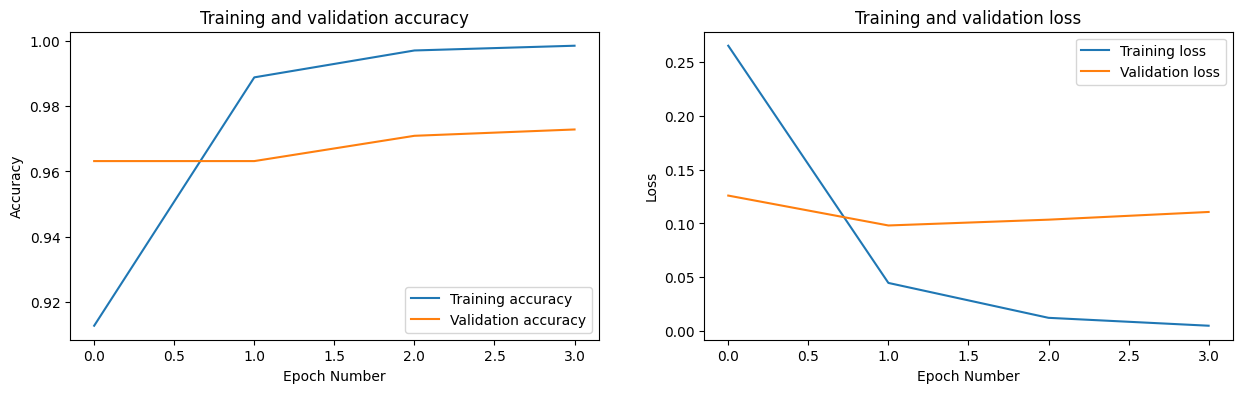

In [186]:
A_train, A_test, B_train, B_test = train_test_split(a, b, train_size=0.5, random_state = 0)
history = model_text.fit(A_train, B_train, epochs=4, validation_split=0.2)
figure = plot.figure(figsize=(15,4))
figure.add_subplot(121)
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.legend(['Training accuracy', 'Validation accuracy'])
plot.title('Training and validation accuracy')
plot.xlabel('Epoch Number')
plot.ylabel('Accuracy')
figure.add_subplot(122)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.legend(['Training loss', 'Validation loss'])
plot.title('Training and validation loss')
plot.xlabel('Epoch Number')
plot.ylabel('Loss')
plot.show()

Висновок.
В ході лабораторної роботи було проведено ознайомлення з проектуванням і навчанням нейромереж, для задач класифікації даних, зображень (https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification) та текстових даних. Як видно з отриманих точності, та втрат, нейромережі навчені відносно вдало.